# Praca domowa 4 - budowanie
### Patryk Rakus, Łukasz Tomaszewski

In [69]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

## Wczytanie danych i wstępna analiza

In [7]:
X = pd.read_csv('urbanGB.txt', names = ['x','y'],header=None)

Ramka zawiera współrzędne wypadków drogowych w Wielkiej Brytanii.

In [8]:
X

,x,y
0,-0.310990,53.7802
1,-3.112550,55.8706
2,-0.088533,51.3806
3,-0.326795,51.4476
4,-3.946530,51.6594
...,...,...
360172,-0.557803,53.2197
360173,-1.748430,52.4872
360174,-0.128844,51.5126
360175,-1.885640,52.4490


In [9]:
X = X.to_numpy()

Sprawdźmy jak wyglądają te punkty na wykresie.

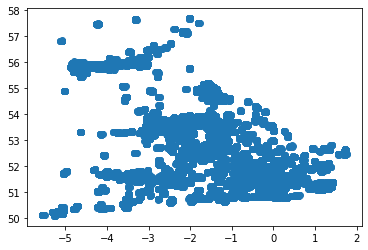

In [10]:
plt.scatter(X[:,0],X[:,1])
plt.show()

Z powyższego wykresu nie widać gołym okiem, jaka liczba klastrów jest najlepsza. 

## KMeans oraz metoda łokcia

W celu sprawdzenia optymalnej liczby klastrów zastosujmy metodę łokcia. Należy wytrenować model dla różnej liczby klastrów, a następnie z wykresu zawierającego wartości wewnątrzklastrowych sum kwadratów, wybrać najlepszą liczbę klastrów. 

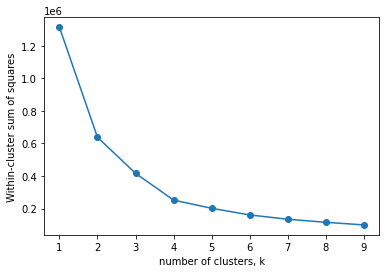

In [11]:
ks = range(1, 10)
scores = []

for k in ks:
    model = KMeans(n_clusters = k)
    model.fit(X)
    scores.append(model.score(X) * -1)
    
plt.plot(ks, scores, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('Within-cluster sum of squares')
plt.xticks(ks)
plt.show()

Z powyższego wykresu możemy odczytać, że optymalna liczba klastrów jest równa 4 lub 5 (tam znajduje się punkt przegięcia).

In [12]:
def plot_kmeans_clusters(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=30, cmap='viridis')

    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.75)
    plt.title('K-means clusters')
    plt.show()

Sprawdźmy jak wyglądają klastry w zależności od wybranej wartości.

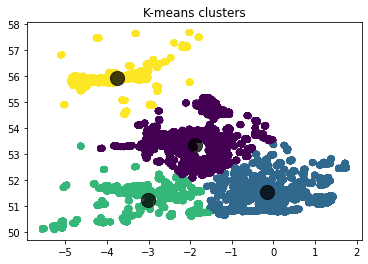

In [13]:
plot_kmeans_clusters(X, n_clusters=4)

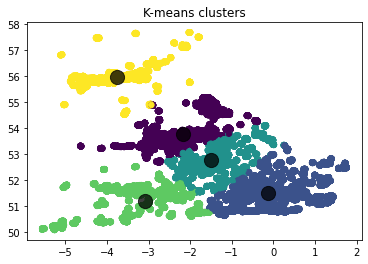

In [14]:
plot_kmeans_clusters(X, n_clusters=5)

Z powyższych wykresów wynika, że różnice pomiędzy 4 a 5 klastrami są niewiekie. Dwa klastry, żółty i zielony pozostają praktycznie bez zmian. Nowy klaster powstaje z punktów należących do klastrów fioletowego i niebieskiego. W tym przypadku wybór pomiędzy 4 a 5 klastrami zależy od tego, czy chcemy mieć mniej klastrów, czy chcemy być bardziej dokładni.

## Klasteryzacja hierarchiczna

In [86]:
from scipy.cluster import hierarchy

Ze względu na złożoność obliczeniową metody aglomeracyjnej, musimy wziąć część danych.

In [144]:
df = pd.DataFrame(X, columns=['x', 'y'])
df = df.sample(frac=0.05, random_state=42).astype('float32')

In [160]:
Z = hierarchy.linkage(df, method='ward')

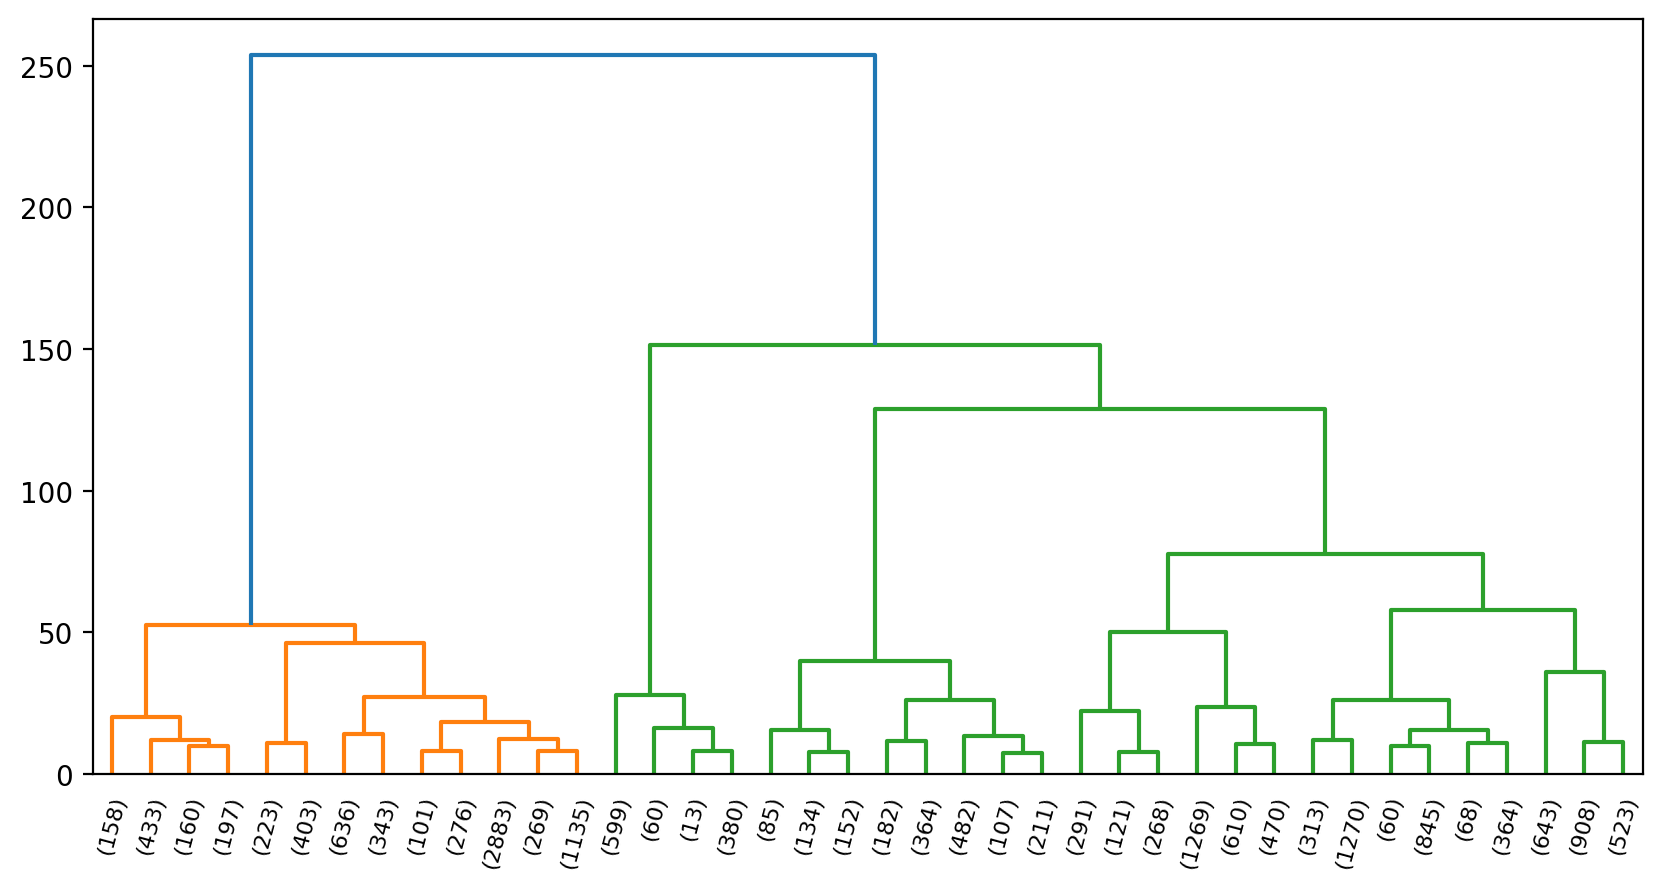

In [161]:
plt.figure(figsize=(10, 5), dpi= 200, facecolor='w', edgecolor='k')
hierarchy.dendrogram(Z, p=40, truncate_mode='lastp', leaf_rotation=75)
plt.show()

Jak widać na dendrogramie najlepsza liczba klastrów wydaje się być równa 4 lub 5 - podobnie do wniosków z metody łokcia.

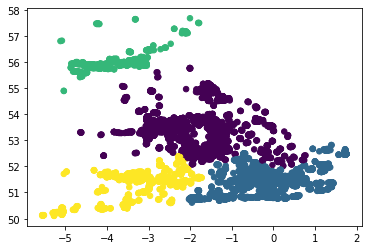

In [165]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=100, linkage='ward')
y = model.fit_predict(df)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=y, s=30, cmap='viridis')
plt.show()

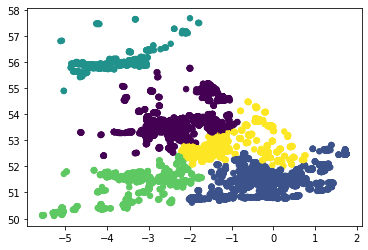

In [166]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=60, linkage='ward')
y = model.fit_predict(df)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=y, s=30, cmap='viridis')
plt.show()

Predykcje są całkiem podobne do tych dla metody KMeans.